In [31]:
import pandas as pd
import numpy as np
import functions
import importlib
importlib.reload(functions)
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Suppress ConvergenceWarning

In [9]:
df_ = pd.read_csv("df_1hot.csv")
y = df_.iloc[:, 0]
X = df_.iloc[:, 1 :]

n, p = X.shape
X.head(5)

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,C_04_0.0,C_04_1.0,C_04_2.0,C_04_3.0,C_04_4.0,C_05_0.0,C_05_1.0,C_05_2.0,C_05_3.0,C_05_4.0
0,1.320635,-1.245359,0.580798,-0.208784,0.879537,-0.147866,-1.384418,-0.098386,0.973221,-1.825075,...,0,0,1,0,0,0,0,1,0,0
1,0.379658,0.877093,0.371622,1.057238,0.739473,1.797215,-0.031937,0.119855,1.822758,0.719912,...,0,0,1,0,0,0,0,1,0,0
2,0.910528,-0.683362,0.990018,0.436947,0.426031,-0.335860,-1.540555,0.132341,0.670108,0.577881,...,0,0,0,1,0,0,0,0,1,0
3,0.590334,1.469343,1.222691,-1.415093,0.774228,0.384068,-0.167099,-1.533052,-1.278514,-0.261866,...,1,0,0,0,0,0,1,0,0,0
4,0.092974,0.856148,-0.998216,-0.146756,-0.952055,0.304902,0.203975,0.144959,0.921411,0.542332,...,0,0,0,1,0,0,0,0,0,1


In [12]:
# create a decisiontreeregressor/classifier
dtree = DecisionTreeRegressor()

# Fit the tree regressor/classifier
dtree.fit(X, y)

DecisionTreeRegressor()

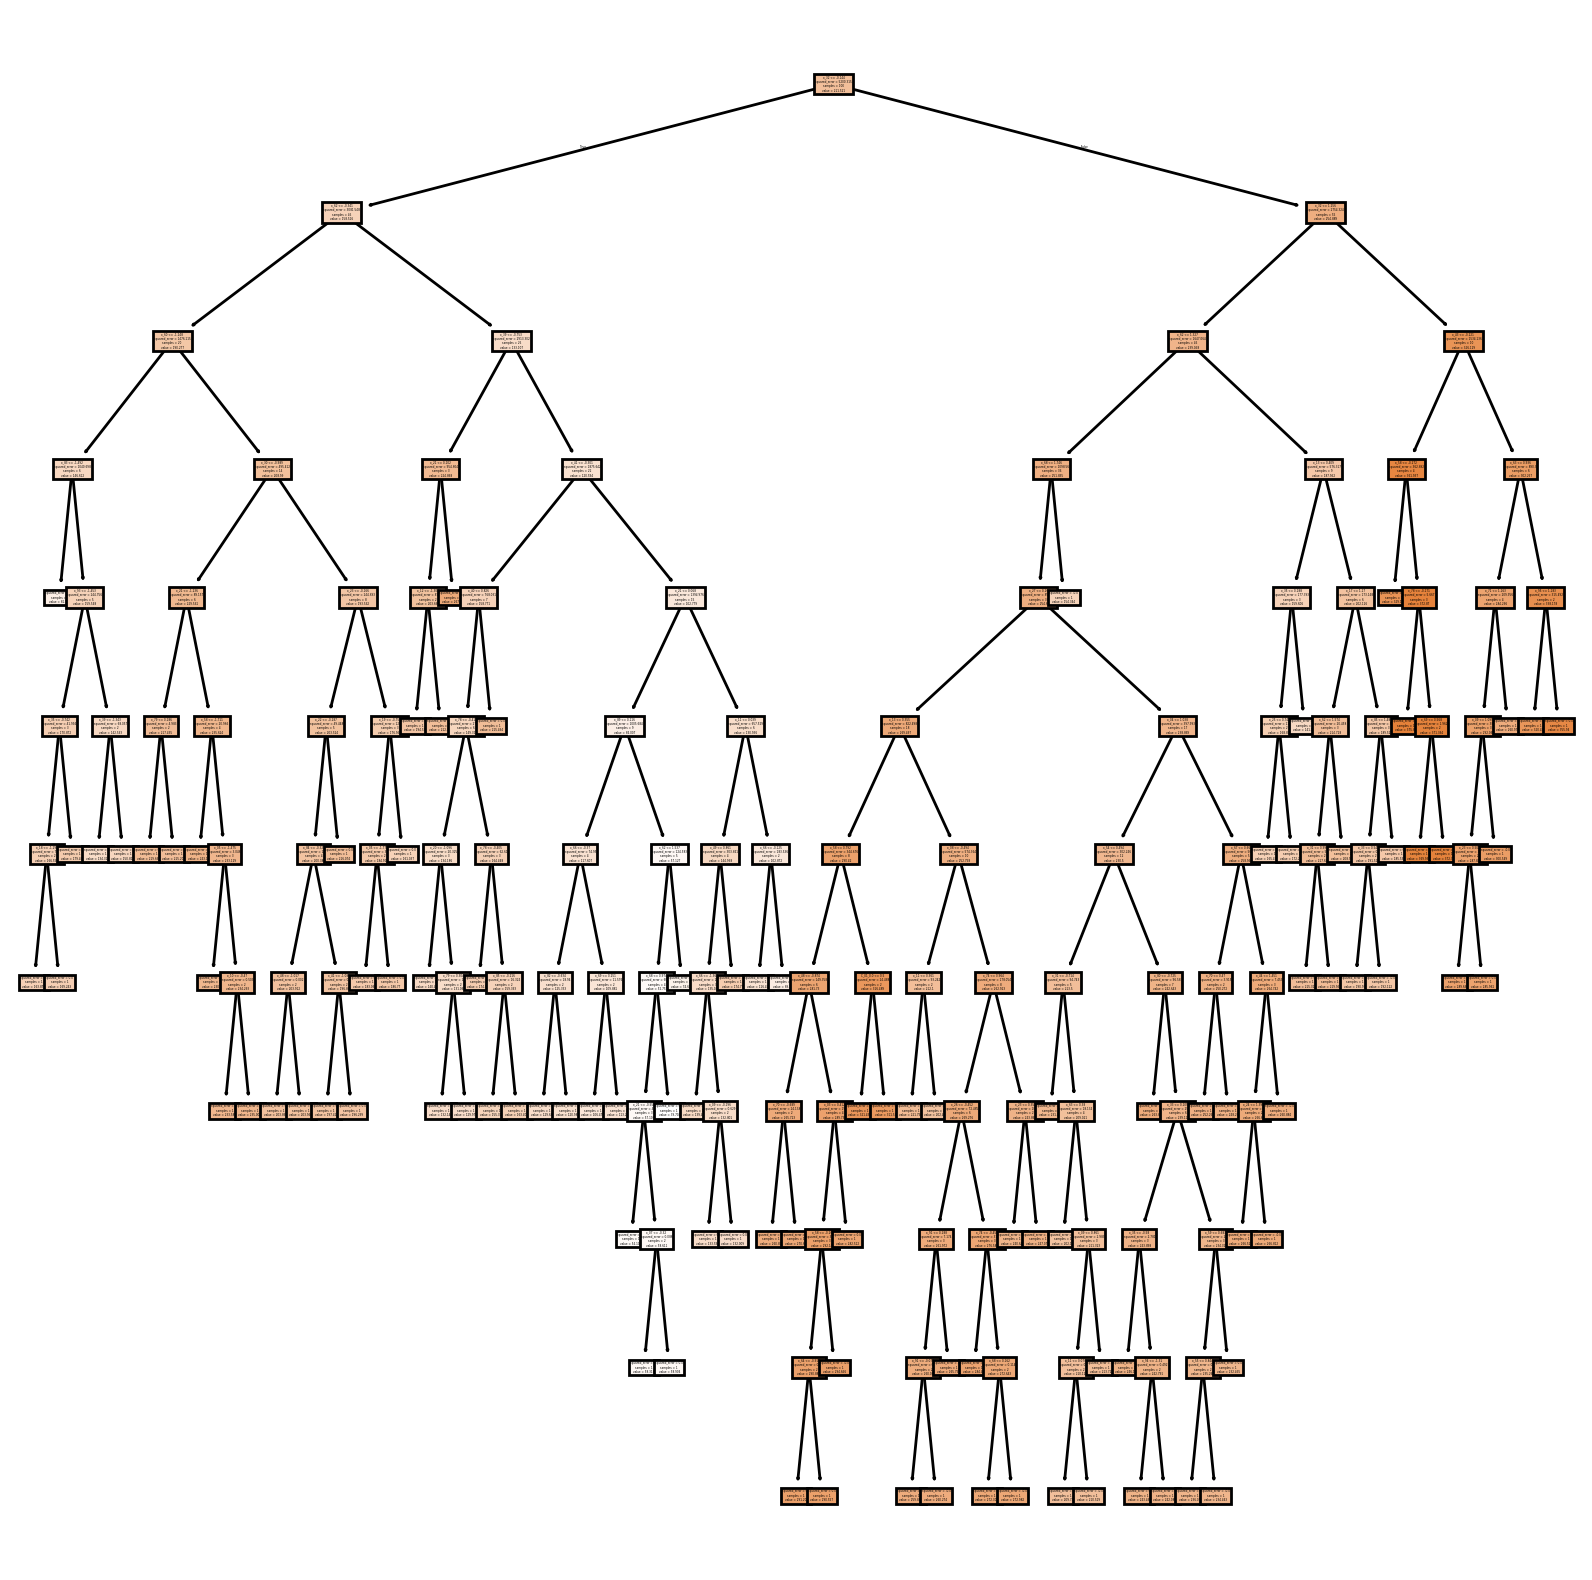

In [17]:
feature_names = X.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=200)
tree.plot_tree(dtree,
               feature_names = feature_names,
               filled = True);

Fitting 5 folds for each of 49 candidates, totalling 245 fits


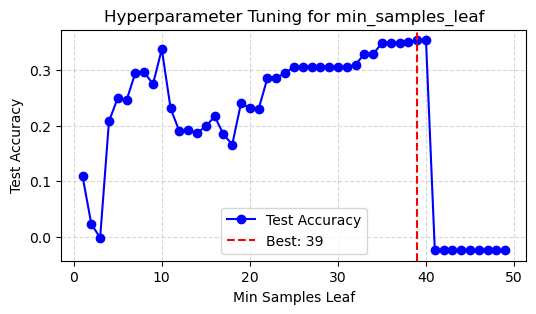

Best estimator: DecisionTreeRegressor(min_samples_leaf=39)


In [30]:
# Define hyperparameter grid
param_grid = {'min_samples_leaf': range(1, 50)}

# Perform Grid Search CV
cv_grid = GridSearchCV(
    estimator=dtree, 
    param_grid=param_grid, 
    cv=5, 
    verbose=1,  # Adjust verbosity if needed
    n_jobs=-1
)

# Fit the model
cv_grid.fit(X, y)

# Extract results
leaf_values = range(1, 50)
mean_test_scores = cv_grid.cv_results_['mean_test_score']

# Plot results
plt.figure(figsize=(6, 3))
plt.plot(leaf_values, mean_test_scores, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.axvline(cv_grid.best_params_['min_samples_leaf'], color='r', linestyle='--', label=f"Best: {cv_grid.best_params_['min_samples_leaf']}")
plt.xlabel('Min Samples Leaf')
plt.ylabel('Test Accuracy')
plt.title('Hyperparameter Tuning for min_samples_leaf')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print best estimator
print(f'Best estimator: {cv_grid.best_estimator_}')


In [21]:
# One standard error rule
meanError = list(cv_grid.cv_results_['mean_test_score'])
stdError = cv_grid.cv_results_['std_test_score']
# this is the index of the smallest error

# the model picks model with highest accuracy and because of that we use max
maxAcc = meanError.index(max(meanError))
 # model does accuracy and not error so we flip shit!
J = np.where(meanError[maxAcc] - stdError[maxAcc] < meanError)[0]

if (len(J) > 0):
    j = int(J[-1::])
else:
    j = minError

min_sample_leaf_opt = j+1
print (f'One standard error rule gives min_samples_leaf: {min_sample_leaf_opt}') # +1 because zero indexed

One standard error rule gives min_samples_leaf: 40


C:\Users\osaul\AppData\Local\Temp\ipykernel_21556\3854157495.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  j = int(J[-1::])


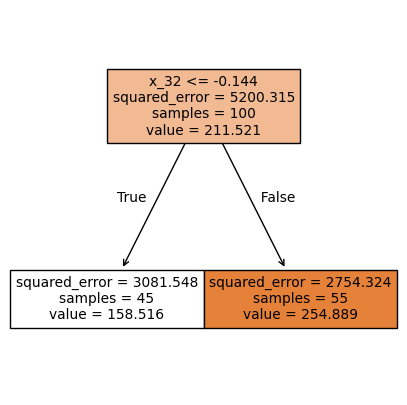

In [28]:
# Build a tree based on best nim_sample_leaf
dtree=DecisionTreeRegressor(min_samples_leaf=min_sample_leaf_opt)

dtree.fit(X, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=100)
tree.plot_tree(dtree,
               feature_names = X.columns,
               class_names = ['No Diagnose','Diagnose'],
               filled = True);